In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
random_char_1 = np.random.exponential(scale=50, size=50000) # scale = 1/λ
random_char_2 = np.random.normal(3,2,size =50000) # mu, sigma
random_char_3 = np.random.choice(['black', 'red', 'white'], 50000, p=[0.6, 0.1, 0.3])
random_char_4 = np.random.choice([1,2,3,4,5], 50000, p=[0.19,0.15,0.18,0.26,0.22])
random_char_5 = np.random.randint(20,100, size=50000)

#Создаем датафрейм
df = pd.DataFrame({'char_1':random_char_1,'char_2':random_char_2, 'char_3':random_char_3, 'char_4':random_char_4, 'char_5':random_char_5})

# char_1 Анализ. А/А тест

In [3]:
# Выборка А_1
A = df['char_1'].sample(n=10000)
A_1 =pd.DataFrame({'char_1':A})

# Выборка А_2
A = df['char_1'].sample(n=10000)
A_2 =pd.DataFrame({'char_1':A})

## Описательная статистика

In [4]:
df_stat = pd.DataFrame()
df_stat['A_1'] = np.array(A_1['char_1'])
df_stat['A_2'] = np.array(A_2['char_1'])
df_stat.describe()

,A_1,A_2
count,10000.000000,10000.000000
mean,50.706013,49.863459
std,50.283198,50.015065
min,0.005698,0.001414
25%,14.788518,14.317277
50%,35.432559,34.451229
75%,70.524495,68.469891
max,506.406075,455.858444


## Визуализация

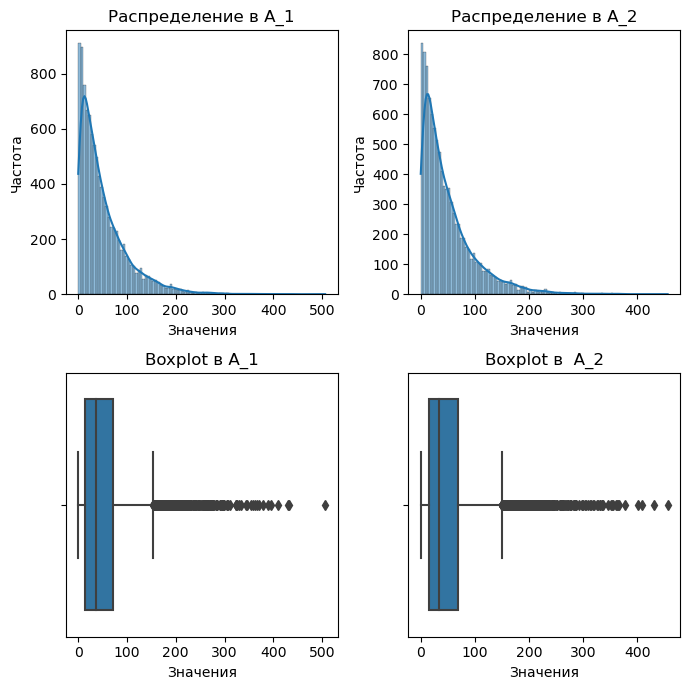

In [5]:
fig,ax = plt.subplots(2,2) # создает фигуру и 4 коорд. оси 
fig.set_size_inches(7,7) # объект фигура. метод задать размер

sns.histplot(A_1['char_1'], kde=True, bins=100, ax=ax[0, 0])
sns.histplot(A_2['char_1'], kde=True, bins=100, ax=ax[0, 1])
sns.boxplot(x=A_1['char_1'], ax=ax[1, 0])
sns.boxplot(x=A_2['char_1'], ax=ax[1, 1])

ax[0, 0].set_title('Распределение в A_1')
ax[0, 0].set_xlabel('Значения')
ax[0, 0].set_ylabel('Частота')

ax[0, 1].set_title('Распределение в A_2')
ax[0, 1].set_xlabel('Значения')
ax[0, 1].set_ylabel('Частота')

ax[1, 0].set_title('Boxplot в A_1')
ax[1, 0].set_xlabel('Значения')

ax[1, 1].set_title('Boxplot в  A_2')
ax[1, 1].set_xlabel('Значения')

plt.tight_layout()  

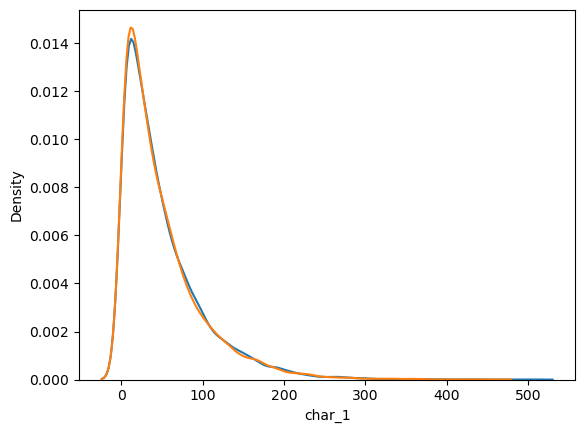

In [6]:
sns.kdeplot(data=A_1['char_1'], label="A_1")
sns.kdeplot(data=A_2['char_1'], label="A_2")
plt.show()

## Проверка на нормальность. Тест Шапиро-Уилка

In [7]:
from scipy import stats
alpha = 0.05


w1, p1 = stats.shapiro(A_1['char_1'])
w2, p2 = stats.shapiro(A_2['char_1'])

print(f"Выборка A_1: W = {w1}, p-value = {p1}.")
print(f"Выборка A_2: W = {w2}, p-value = {p2}.")



if p1 > alpha:
    print("Выборка A_1 похожа на нормальное распределение (не отвергаем H0)")
else:
    print("Выборка A_1 не похожа на нормальное распределение (отвергаем H0)")

if p2 > alpha:
    print("Выборка A_2 похожа на нормальное распределение (не отвергаем H0)")
else:
    print("Выборка A_2 не похожа на нормальное распределение (отвергаем H0)")

Выборка A_1: W = 0.8183733224868774, p-value = 0.0.
Выборка A_2: W = 0.8131861686706543, p-value = 0.0.
Выборка A_1 не похожа на нормальное распределение (отвергаем H0)
Выборка A_2 не похожа на нормальное распределение (отвергаем H0)


C:\Users\Колонтай\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Проверка на равенство дисперсий. Тест Левена, Тест Барлетта, Брауна-Форсайта

In [8]:
alpha = 0.05

w1, p1 = stats.levene(A_1['char_1'], A_2['char_1'])
w2, p2 = stats.bartlett(A_1['char_1'], A_2['char_1'])
w3, p3 = stats.fligner(A_1['char_1'], A_2['char_1'])


print('Результаты Теста Левена')
print('------------------------------------------------------------------------')
print(f"Выборка A_1: W = {w1}, p-value = {p1}.")
if p1 > alpha:
    print("Дисперсии выборок равны (не отвергаем H0)")
else:
    print("Дисперсии выборок не равны (отвергаем H0)")
    
print() 
print()
print()

print('Результаты Теста Барлетта')
print('------------------------------------------------------------------------')
print(f"Выборка A_1: W = {w2}, p-value = {p2}.")

if p2 > alpha:
    print("Дисперсии выборок равны (не отвергаем H0)")
else:
    print("Дисперсии выборок не равны (отвергаем H0)")
    
print() 
print()
print()

print('Результаты Теста Брауна-Форсайта')
print('------------------------------------------------------------------------')
print(f"Выборка A_1: W = {w3}, p-value = {p3}.")

if p3 > alpha:
    print("Дисперсии выборок равны (не отвергаем H0)")
else:
    print("Дисперсии выборок не равны (отвергаем H0)")

Результаты Теста Левена
------------------------------------------------------------------------
Выборка A_1: W = 0.42149278061371365, p-value = 0.5162005700674538.
Дисперсии выборок равны (не отвергаем H0)



Результаты Теста Барлетта
------------------------------------------------------------------------
Выборка A_1: W = 0.28583101834925173, p-value = 0.5929045823123161.
Дисперсии выборок равны (не отвергаем H0)



Результаты Теста Брауна-Форсайта
------------------------------------------------------------------------
Выборка A_1: W = 2.0869315270788538, p-value = 0.14856420613149768.
Дисперсии выборок равны (не отвергаем H0)


## Тест Манна-Уитни о равенстве распределений

In [9]:
w4, p4 = stats.mannwhitneyu(A_1['char_1'], A_2['char_1'],alternative='two-sided') # less/ greater

print('Результаты Теста Манна-Уитни')
print('------------------------------------------------------------------------')
print(f"Выборка A_1: W = {w4}, p-value = {p4}.")
if p4 > alpha:
    print("Одинаковые распределения (не отвергаем H0)")
else:
    print("Распределения не равны (отвергаем H0)")

Результаты Теста Манна-Уитни
------------------------------------------------------------------------
Выборка A_1: W = 50595693.0, p-value = 0.14453588211027554.
Одинаковые распределения (не отвергаем H0)


## T-тест Стьюдента: без преобразований / log / ЦПТ

ЦПТ

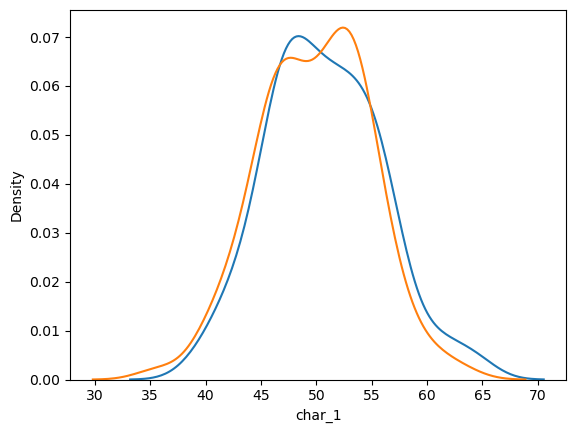

In [10]:
# обработаем на 20 бакетов А_1
split_data_1 = np.array_split(A_1['char_1'], 100)
mean_value = [np.mean(i) for i in split_data_1]
A_split_1 =pd.DataFrame(mean_value, columns = ['char_1'])

# обработаем на 20 бакетов А_2
split_data_2 = np.array_split(A_2['char_1'], 100)
mean_value = [np.mean(i) for i in split_data_2]
A_split_2 =pd.DataFrame(mean_value, columns = ['char_1'])

# визуализируем
sns.kdeplot(data=A_split_1['char_1'], label="A_1")
sns.kdeplot(data=A_split_2['char_1'], label="A_2")
plt.show()

Логарифмические преобразования

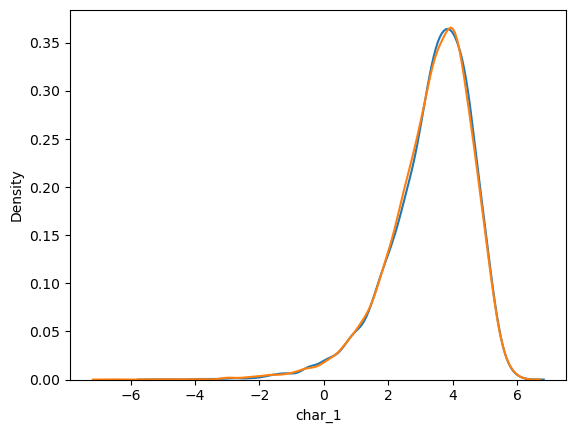

In [11]:
# логарифмируем
log_1 = pd.DataFrame()
log_2 = pd.DataFrame()
log_1['char_1'] = np.log(A_1['char_1'])
log_2['char_1'] = np.log(A_2['char_1'])


# визуализируем
sns.kdeplot(data=log_1['char_1'], label="A_1")
sns.kdeplot(data=log_2['char_1'], label="A_2")
plt.show()

In [12]:
w5, p5 = stats.ttest_ind(log_1['char_1'], log_2['char_1'], equal_var=True)# для версии с равными дисперсиями (False -Уэлч)

print('Результаты t-Теста Стьюдента (нормализованный.log)')
print('------------------------------------------------------------------------')
print(f"Выборка (нормализованная): W = {w5}, p-value = {p5}.")
if p5 > alpha:
    print("Одинаковые средние (не отвергаем H0)")
else:
    print("Средние отличаются (отвергаем H0)")
    

print() 
print()
print()

w6, p6 = stats.ttest_ind(A_1['char_1'], A_2['char_1'], equal_var=True)# для версии с равными дисперсиями (False -Уэлч)

print('Результаты t-Теста Стьюдента (без преобразований)')
print('------------------------------------------------------------------------')
print(f"Выборка: W = {w6}, p-value = {p6}.")
if p6 > alpha:
    print("Одинаковые средние (не отвергаем H0)")
else:
    print("Средние отличаются (отвергаем H0)")

print() 
print()
print()

w7, p7 = stats.ttest_ind(A_split_1['char_1'], A_split_2['char_1'], equal_var=True)# для версии с равными дисперсиями (False -Уэлч)

print('Результаты t-Теста Стьюдента (с ипользованием ЦПТ)')
print('------------------------------------------------------------------------')
print(f"Выборка: W = {w7}, p-value = {p7}.")
if p7 > alpha:
    print("Одинаковые средние (не отвергаем H0)")
else:
    print("Средние отличаются (отвергаем H0)")

Результаты t-Теста Стьюдента (нормализованный.log)
------------------------------------------------------------------------
Выборка (нормализованная): W = 1.3680956555698336, p-value = 0.17129750769512245.
Одинаковые средние (не отвергаем H0)



Результаты t-Теста Стьюдента (без преобразований)
------------------------------------------------------------------------
Выборка: W = 1.1880033718341632, p-value = 0.23484619022717798.
Одинаковые средние (не отвергаем H0)



Результаты t-Теста Стьюдента (с ипользованием ЦПТ)
------------------------------------------------------------------------
Выборка: W = 1.1850029578990617, p-value = 0.2374366263031382.
Одинаковые средние (не отвергаем H0)


# char_3 Анализ. А/А тест

In [ ]:
# Выборка А_1
A = df['char_3'].sample(n=10000)
A_1 =pd.DataFrame({'char_3':A})

# Выборка А_2
A = df['char_3'].sample(n=10000)
A_2 =pd.DataFrame({'char_3':A})

In [ ]:
print('доли выборка А_1')
print('----------------')
for i in A_1.char_3.unique():
    print(f'{i} : {A_1[A_1.char_3 ==i].char_3.count()/len(A_1.char_3)}')

print()

print('доли выборка А_2')
print('----------------')
for i in A_2.char_3.unique():
    print(f'{i} : {A_2[A_2.char_3 ==i].char_3.count()/len(A_2.char_3)}')

### МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ

In [13]:
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import TTestIndPower


baseline_cr = 0.5843 # базовый уровень конверсии
min_effect = 0.05 # минимальный значимый результат

effect_size = proportion_effectsize(baseline_cr, baseline_cr + min_effect)


alpha = 0.05 # уровень значимости
power = 0.8  #уровень мощности
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size, power=power, alpha=alpha, alternative='two-sided')

print(f"Необходимый размер выборки: {sample_size:.0f}")

Необходимый размер выборки: 1494


C:\Users\Колонтай\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\Users\Колонтай\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


## Z-test Пропорций (только для одной категориии) 

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

part = [A_1[A_1.char_3 =='red'].char_3.count(),A_2[A_2.char_3 =='red'].char_3.count()]
all_p = [len(A_1.char_3),len(A_2.char_3)]

w8, p8 = proportions_ztest(part, all_p)

print('Результаты Z-test Пропорций:')
print('------------------------------------------------------------------------')
print(f"Выборка: W = {w8}, p-value = {p8}.")
if p8 > alpha:
    print("Пропорции в категории red одинаковые (нет оснований отвергнуть H0)")
else:
    print("Пропорции разные (отвергаем H0)")

## Хи-квадрат (всего распределения) 

In [ ]:
# Создание дополнительной колонки для каждого датафрейма
A_1['group'] = 'A_1'
A_2['group'] = 'A_2'

# Объединение датафреймов
df_stat = pd.concat([A_1, A_2])

# Создание таблицы сопряженности
contingency = pd.crosstab(df_stat['group'], df_stat['char_3'])


# проведение теста Хи-квадрат
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print('Результаты Хи-квадрат теста:')
print('------------------------------------------------------------------------')
print(f"Chi2 value = {chi2}")
print(f"p-value = {p}")
print(f"Degrees of freedom = {dof}")

if p > alpha:
    print("Пропорции одинаковые (нет оснований отвергнуть H0)")
else:
    print("Пропорции разные (отвергаем H0)")

## Хи-квадрат (всего распределения)  под вопросом

In [ ]:
# Загрузите данные в переменные
group_A = [A_1[A_1.char_3 == 'black'].char_3.count(), len(A_1.char_3)]
group_B = [A_2[A_2.char_3 == 'black'].char_3.count(), len(A_2.char_3)]

# Запустите тест
chi2, p, dof, ex = stats.chi2_contingency([group_A, group_B], correction=False) #Поправка Йейтса не применяется

# Рассчитайте доверительный интервал для изменения
lift = (group_B[0]/group_B[1])/(group_A[0]/group_A[1])
std_error = np.sqrt(1/group_B[0] + 1/group_B[1] + 1/group_A[0] + 1/group_A[1])
ci = stats.norm.interval(0.95, loc=lift, scale=std_error)

# Выводим результаты
print("Хи-квадрат p-value: ", p)
print("Доверительный интервал изменения: ", ci)

# Проверяем есть ли изменение
if p < 0.05 and ci[0] > 1:
    print("Вариант лучше.")
else:
    print("Разницы нет.")

## Логистическая регрессия

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm


df_log = pd.DataFrame({
    'user_id': range(1, 1001),
    'version': np.random.choice(['A', 'B'], 1000),
    'converted': np.random.choice([0, 1], 1000)
})


le = LabelEncoder()
df_log['version'] = le.fit_transform(df_log['version'])

X = sm.add_constant(df_log[['version']])
y = df_log['converted']

model = sm.Logit(y, X)
result = model.fit()

# выводим summary
print(result.summary())

# char_4 Анализ. А/А тест

In [ ]:
# Выборка А_1
A = df['char_4'].sample(n=10000)
A_1 =pd.DataFrame({'char_4':A})

# Выборка А_2
A = df['char_4'].sample(n=10000)
A_2 =pd.DataFrame({'char_4':A})

In [ ]:
# Создание дополнительной колонки для каждого датафрейма
A_1['group'] = 'A_1'
A_2['group'] = 'A_2'

# Объединение датафреймов
df_stat = pd.concat([A_1, A_2])

# Создание таблицы сопряженности
contingency = pd.crosstab(df_stat['group'], df_stat['char_4'])


# проведение теста Хи-квадрат
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print('Результаты Хи-квадрат теста:')
print('------------------------------------------------------------------------')
print(f"Chi2 value = {chi2}")
print(f"p-value = {p}")
print(f"Degrees of freedom = {dof}")

if p > alpha:
    print("Пропорции одинаковые (нет оснований отвергнуть H0)")
else:
    print("Пропорции разные (отвергаем H0)")

# ДОП. ТЕХНИКИ

# CUPED

Это преобразование смещает "после" данные таким образом, чтобы учесть влияние "до" данных, уменьшая тем самым вариабельность и улучшая статистическую мощность эксперимента. В итоге возвращаются корректированные данные для обеих групп.

In [ ]:
import pandas as pd

def get_cuped_adjusted(A_before, B_before, A_after, B_after):
    cv = cov([A_after + B_after, A_before + B_before])
    theta = cv[0, 1] / cv[1, 1]
    mean_before = mean(A_before + B_before)
    A_after_adjusted = [after - (before - mean_before) * theta for after, before in zip(A_after, A_before)]
    B_after_adjusted = [after - (before - mean_before) * theta for after, before in zip(B_after, B_before)]
    return A_after_adjusted, B_after_adjusted

# BOOTSTRAP

НЕ использовать с т-тестом. 
В итоге получим распределение разностей средних. середина этого распределения будет совпадать (или почти совпадать) с разностью средних двух исходных выборок. 
Стандартное отклонение этого распределения будет примерно равно стандартной ошибке разности средних.

Остается посчитать p-value, то есть посмотреть какой процент наблюдений этого распределения лежит дальше от 0, чем разность средних исходных выборок.

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# СОЗДАЕМ ГЕНЕРАЛЬНУЮ СОВОКУПНОСТЬ 

random = np.random.normal(3,50,size =50000) # mu, sigma
df = pd.DataFrame({'char':random})

# ИЗ НЕЕ ДЕЛАЕМ ДВЕ МАЛЕНЬКИЕ ВЫБОРКИ

# Выборка test
A_test = df['char'].sample(n=4000)
test =pd.DataFrame({'char':A_test})
# Выборка control
A_control = df['char'].sample(n=4000)
control =pd.DataFrame({'char':A_control})
# назначаем количество бутстрап-сэмплов


n_bootstrap = 5000

# создаем пустой список для сохранения разности средних
bootstrap_diff = []

# генерируем бутстрап-сэмплы и расчитываем разность средних
for i in range(n_bootstrap):
    control_sample = A_control.sample(n=len(A_control), replace=True)
    test_sample = A_test.sample(n=len(A_test), replace=True)
    bootstrap_diff.append(test_sample.mean() - control_sample.mean())

# преобразуем список в numpy array для удобства расчетов
bootstrap_diff = np.array(bootstrap_diff)

# вычисляем среднюю разность средних и стандартное отклонение
mean_diff = np.mean(bootstrap_diff)
std_diff = np.std(bootstrap_diff)

# вычисляем p-value
observed_diff = A_test.mean() - A_control.mean()
p_value = (np.abs(bootstrap_diff - mean_diff) > np.abs(observed_diff - mean_diff)).mean() # для двусторонней
#p_value = (bootstrap_diff - observed_diff > 0).mean() # для односторонней

# выводим полученные результаты
print('Bootstrap Mean Difference:', mean_diff)
print('Bootstrap Standard Deviation:', std_diff)
print('Observed Mean Difference:', observed_diff)
print('P-value:', p_value)

Bootstrap Mean Difference: -1.2777267935307184
Bootstrap Standard Deviation: 1.1163426490542168
Observed Mean Difference: -1.287076108117418
P-value: 0.9928


#### ЧЕРЕЗ ПЕРЕСЕЧЕНИЕ ИНТЕРВАЛОВ

In [11]:

n_bootstrap = 5000

bootstrapped_test_means = []
bootstrapped_control_means = []

# генерируем бутстреп-выборки и рассчитываем средние значения
for i in range(n_bootstrap):
    bootstrapped_test = test['char'].sample(len(test), replace=True)
    bootstrapped_control = control['char'].sample(len(control), replace=True)
    bootstrapped_test_means.append(bootstrapped_test.mean())
    bootstrapped_control_means.append(bootstrapped_control.mean())

lower_test = np.percentile(bootstrapped_test_means, 2.5)
upper_test = np.percentile(bootstrapped_test_means, 97.5)
lower_control = np.percentile(bootstrapped_control_means, 2.5)
upper_control = np.percentile(bootstrapped_control_means, 97.5)

print(f'{lower_test} - {upper_test}')

print(f'{lower_control} - {upper_control}')

0.7034298134197347 - 3.743983659450945
1.9600817059439755 - 5.0205383995408495


# Проба Пера

In [217]:
# СОЗДАЕМ ГЕНЕРАЛЬНУЮ СОВОКУПНОСТЬ С ЗАРАНЕЕ ИЗВЕСТНЫМ РАЗЛИЧИЕМ В СРЕДНИХ  = 7

A = np.random.normal(3,120,size =50000) # mu, sigma
B = np.random.normal(10,120,size =50000) # mu, sigma


#Создаем датафрейм
df = pd.DataFrame({'control':A,'test':B})

In [345]:
# Cчитаем необходимый размер выборки

power =0.8
z_power = stats.norm.ppf(1-power)
sig =0.025
z_sig = stats.norm.ppf(1-sig)
alpha =0.05
mde = 7 # Пусть предполагаемый эффект равен 7

n_viborka = (2*120**2)*((z_sig - z_power)**2)/(mde**2)
n_viborka = round(n_viborka)
print(n_viborka)

4613


In [346]:
# Выборка test
test = np.array(df['test'].sample(n=n_viborka))
control = np.array(df['control'].sample(n=n_viborka))
var_test = df_2.test.std()**2
var_control = df_2.control.std()**2

df_2 =pd.DataFrame({'test':test, 'control':control})

In [348]:
# ПРОВЕДЕМ СТАНДАРТНЫЙ Т-ТЕСТ НА РАВЕНСТВО СРЕДНИХ 
w, p = stats.ttest_ind(df_2.test, df_2.control, equal_var=True)# для версии с равными дисперсиями (False -Уэлч)

print('Результаты t-Теста Стьюдента')
print('------------------------------------------------------------------------')
print(f"Выборка: W = {w}, p-value = {p}.")
if p > alpha:
    print("Одинаковые средние (не отвергаем H0)")
else:
    print("Средние отличаются (отвергаем H0)")

Результаты t-Теста Стьюдента
------------------------------------------------------------------------
Выборка: W = 3.8159441701758854, p-value = 0.000136549535580529.
Средние отличаются (отвергаем H0)


In [349]:
# ТЕПЕРЬ ПРОВЕДЕМ Т-ТЕСТ НА ПРОВЕРКУ ПРАКТИЧЕСКОГО ЭФФЕКТА
df_2.test_adjusted = df_2.test - 7

w, p = stats.ttest_ind(df_2.test_adjusted, df_2.control, equal_var=True)

print('Результаты t-Теста Стьюдента')
print('------------------------------------------------------------------------')
print(f"Выборка : W = {w}, p-value = {p}.")
if p > alpha:
    print("Одинаковые средние (не отвергаем H0)")
else:
    print("Средние отличаются (отвергаем H0)")

Результаты t-Теста Стьюдента
------------------------------------------------------------------------
Выборка : W = 0.9411836008665493, p-value = 0.3466354265195646.
Одинаковые средние (не отвергаем H0)


C:\Users\Колонтай\AppData\Local\Temp\ipykernel_11380\2127562268.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_2.test_adjusted = df_2.test - 7


In [17]:
# СОЗДАЕМ ГЕНЕРАЛЬНУЮ СОВОКУПНОСТЬ С ЗАРАНЕЕ ИЗВЕСТНЫМ РАЗЛИЧИЕМ В СРЕДНИХ  = 7

A = np.random.normal(700,120,size =50000) # mu, sigma
B = np.random.normal(720,120,size =50000) # mu, sigma


#Создаем датафрейм
df = pd.DataFrame({'control':A,'test':B})

# Cчитаем необходимый размер выборки

power =0.8
z_power = stats.norm.ppf(1-power)
sig =0.025
z_sig = stats.norm.ppf(1-sig)
alpha =0.05
mde = 20 # Пусть предполагаемый эффект равен 7

n_viborka = (2*120**2)*((z_sig - z_power)**2)/(mde**2)
n_viborka = round(n_viborka)
print(n_viborka)

# Выборка 
test = np.array(df['test'].sample(n=n_viborka))
control = np.array(df['control'].sample(n=n_viborka))


df_2 =pd.DataFrame({'test':test, 'control':control})
var_test = df_2.test.std()**2
var_control = df_2.control.std()**2

# ПРОВЕДЕМ СТАНДАРТНЫЙ Т-ТЕСТ НА РАВЕНСТВО СРЕДНИХ 
w, p = stats.ttest_ind(df_2.test, df_2.control, equal_var=True)# для версии с равными дисперсиями (False -Уэлч)

print('Результаты t-Теста Стьюдента')
print('------------------------------------------------------------------------')
print(f"Выборка: W = {w}, p-value = {p}.")
if p > alpha:
    print("Одинаковые средние (не отвергаем H0)")
else:
    print("Средние отличаются (отвергаем H0)")
    
    
# ТЕПЕРЬ ПРОВЕДЕМ Т-ТЕСТ НА ПРОВЕРКУ ПРАКТИЧЕСКОГО ЭФФЕКТА
df_2.test_adjusted = df_2.test - 7

w, p = stats.ttest_ind(df_2.test_adjusted, df_2.control, equal_var=True)

print('Результаты t-Теста Стьюдента')
print('------------------------------------------------------------------------')
print(f"Выборка : W = {w}, p-value = {p}.")
if p > alpha:
    print("Одинаковые средние (не отвергаем H0)")
else:
    print("Средние отличаются (отвергаем H0)")

565
Результаты t-Теста Стьюдента
------------------------------------------------------------------------
Выборка: W = 2.734247372702366, p-value = 0.006350195577756931.
Средние отличаются (отвергаем H0)
Результаты t-Теста Стьюдента
------------------------------------------------------------------------
Выборка : W = 1.733288403976605, p-value = 0.08331769243508051.
Одинаковые средние (не отвергаем H0)


C:\Users\Колонтай\AppData\Local\Temp\ipykernel_26324\1747840725.py:45: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_2.test_adjusted = df_2.test - 7


In [6]:
A

array([ 276.44640183,  -86.06243562, -273.74857446, ...,   98.94380785,
        207.58833305,   55.27491033])

Вручную

In [337]:
diff_mean = df_2.test.mean() - df_2.control.mean()
ESE = (var_test/len(df_2.test) + var_control/len(df_2.control))**(1/2)
t_test = (diff_mean -7)/ESE
degrees_of_freedom = (var_test/len(df_2.test) + var_control/len(df_2.control))**2 / ((var_test/len(df_2.test))**2/(len(df_2.test) -1)+(var_control/len(df_2.control))**2/(len(df_2.control) -1))
p_value = 2 * t.sf(t_test, df=degrees_of_freedom) 
print(p_value)

1.4341616793071923


NameError: name 'bootstrapped_test' is not defined

# РАСЧЕТ МОЩНОСТИ

In [11]:
# Параметры
nobs1 = len(bootstrapped_test)  # Размер первой выборки
nobs2 = len(bootstrapped_control)  # Размер второй выборки
alpha = 0.05  # Уровень значимости

# Вычисляем размер эффекта (Cohen's d)
mean1 = np.mean(bootstrapped_test)
mean2 = np.mean(bootstrapped_control)
std_dev1 = np.std(bootstrapped_test, ddof=1)  # ddof=1 указывает на использование несмещенной оценки
std_dev2 = np.std(bootstrapped_control, ddof=1)  
SDpooled = np.sqrt(((nobs1 - 1) * std_dev1 ** 2 + (nobs2 - 1) * std_dev2 ** 2) / (nobs1 + nobs2 - 2))
effect_size = np.abs(mean1 - mean2) / SDpooled  # модуль разности средних используется для избежания отрицательного размера эффекта

# Инициализируем класс мощности
power_analysis = TTestIndPower()

# Расчет мощности
power = power_analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=nobs2/nobs1)

print('Мощность теста: {:.3f}'.format(power))

Мощность теста: 0.406


In [43]:
import scipy.stats as stats
from tqdm.notebook import tqdm as tqdm_notebook
from statsmodels.stats.proportion import proportion_confint

In [37]:

# Зададим исходные параметры
mean_a = 1000 
mean_b = 1003
var_a = 90000
var_b = 90000
mde = mean_b-mean_a # Реальный эффект
sig = 0.025

In [33]:
z_sig = stats.norm.ppf(1-sig)

In [34]:
z_sig

1.959963984540054

In [35]:
N = 1000
theoretical_power = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
real_power = []
left_real_power = []
right_real_power = []
sample_size = []

In [38]:
tqdm_notebook(theoretical_power)

  0%|          | 0/10 [00:00<?, ?it/s]

In [40]:
def strange_ttest(sample_a, sample_b, z_sig, mde):
    
    mean_sample_a = np.mean(sample_a)
    mean_sample_b = np.mean(sample_b)
    diff_mean = mean_sample_b - mean_sample_a
    
    std_error_a = np.var(sample_a)/len(sample_a)
    std_error_b = np.var(sample_b)/len(sample_b)
    diff_mean_std_error = std_error_a + std_error_b
    t_stat = diff_mean/np.sqrt(diff_mean_std_error)
    
    if t_stat >= z_sig and diff_mean >= mde: #добавляем условие на MDE
        res = 1
    else:
        res = 0
    return res

In [44]:
for power in tqdm_notebook(theoretical_power):
    
    results = []
    
    z_power = stats.norm.ppf(1-power)
    n = (var_a + var_b)*((z_sig - z_power)**2)/(mde**2)
    n = round(n)
    
    for i in tqdm_notebook(range(N)):

        sample_a = stats.norm(loc=mean_a, scale=np.sqrt(var_a)).rvs(n)
        sample_b = stats.norm(loc=mean_b, scale=np.sqrt(var_b)).rvs(n)
        res = strange_ttest(sample_a, sample_b, z_sig, mde)
        results.append(res)  
        
    empirical_power = np.mean(results)
    # считаем доверительный интервал для вероятности успеха серии испытаний Бернулли
    left_real_level, right_real_level = proportion_confint(count=N*empirical_power, 
                                                           nobs=N, 
                                                           alpha=0.05, 
                                                           method='wilson')
        
    real_power.append(empirical_power)
    left_real_power.append(left_real_level)
    right_real_power.append(right_real_level)
    sample_size.append(n)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [6]:
random_char = np.random.randint(20,100, size=50000)

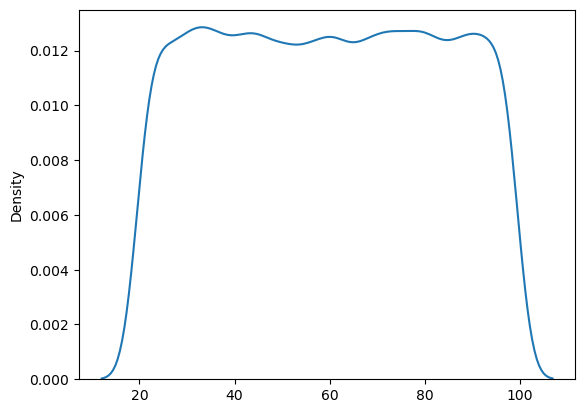

In [7]:
sns.kdeplot(data=random_char, label="A_1")
plt.show()

In [8]:
random_char.mean()

59.54568

In [9]:
random_char.std()

23.081209529346594

In [11]:
df = pd.DataFrame({'A':random_char})

In [13]:
A = df.sample(n=10000)

In [15]:
A.mean()

A    59.837
dtype: float64

In [16]:
A.std()

A    23.213568
dtype: float64